In [1]:
import pandas as pd

In [2]:
#UserInfo.tsv
business_by_demography =pd.read_csv('/home/chris/datasets/european_union/test.tsv',delimiter='\t',encoding='utf-8')
print(list(business_by_demography.columns.values)) #file header

['GEO,LEG_FORM,INDIC_SB,NACE_R2\\TIME', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [3]:
print(business_by_demography.head(5)) #last N rows

                  GEO,LEG_FORM,INDIC_SB,NACE_R2\TIME 2006 2007 2008     2009  \
0  European Union (aggregate changing according t...    :    :    :        :   
1  European Union (28 countries),Total,Net busine...    :    :    :        :   
2  European Union (27 countries),Total,Net busine...    :    :    :        :   
3  Belgium,Total,Net business population growth -...    :    :    :  12.26 b   
4  Bulgaria,Total,Net business population growth ...    :    :    :    20.78   

    2010   2011  2012   2013  2014  2015  
0      :      :     :      :     :     :  
1      :      :     :      :     :     :  
2      :      :     :      :     :     :  
3   2.10   2.39  1.33  -0.01  2.29  1.22  
4  -1.15  -1.21  1.19   1.16  1.62  1.92  


In [5]:
business_by_demography = business_by_demography.fillna(0)

In [6]:
business_by_demography.columns

Index(['GEO,LEG_FORM,INDIC_SB,NACE_R2\TIME', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [7]:
test = business_by_demography.loc[3]
type(test)

pandas.core.series.Series

In [8]:
import re
iterator = business_by_demography.iterrows()

pattern = re.compile("germany*")
data = []
for index, row in iterator:
    if pattern.match(row[0].lower()):
        data.append(business_by_demography.loc[index])

df_germany = pd.DataFrame(data)

In [9]:
df_germany

,"GEO,LEG_FORM,INDIC_SB,NACE_R2\TIME",2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7,Germany (until 1990 former territory of the FR...,:,:,:,-1.18,0.73,0.91,0.41,-0.85,-5.17,-0.81
42,Germany (until 1990 former territory of the FR...,:,:,:,17.21,17.28,17.21,16.42,15.66,15.45,14.74 p
77,Germany (until 1990 former territory of the FR...,:,:,:,8.90,8.56,8.55,8.47,8.27,8.25,7.66 p
112,Germany (until 1990 former territory of the FR...,:,:,: e,1.39 e,1.28 e,1.19 e,1.14 e,1.14 e,1.00 e,: p
147,Germany (until 1990 former territory of the FR...,:,:,:,-2.26,-0.08,1.20,0.56,-0.81,-5.48,-0.80
182,Germany (until 1990 former territory of the FR...,:,:,:,18.79,18.66,19.17,18.20,17.07,16.82,16.43 p
217,Germany (until 1990 former territory of the FR...,:,:,:,10.18,9.66,9.72,9.74,9.45,9.32,8.88 p
252,Germany (until 1990 former territory of the FR...,:,:,: e,4.82 e,4.52 e,4.40 e,4.41 e,4.38 e,3.53 e,: p
287,Germany (until 1990 former territory of the FR...,:,:,:,0.16,2.39,-1.11,-2.46,0.46,-12.55,-1.11
322,Germany (until 1990 former territory of the FR...,:,:,:,17.12,17.83,16.01,15.29,16.33,16.56,14.69 p


In [11]:
for i in range(1,df_germany.shape[0]):    
    df_germany.iloc[:,1:1+i] = df_germany.iloc[:,1:1+i].replace(':', '0').replace(': e', '0').replace(': p', '0').replace(': p', '0')
    

In [12]:
for column in df_germany.columns:  
    df_germany[column].apply(lambda x: x.split(' ')[0].replace('e', ''))

In [50]:
for column in df_germany.columns:  
    column = str(column)
    df_germany[column]  = df_germany[column].str.strip('e').str.strip('p')

In [49]:
#df_germany['2011'].apply(lambda x: float(x.split()[0].replace('.', '')))

In [55]:
df_germany.apply(pd.to_numeric, args=('coerce',)).mean()
df_germany =  df_germany.apply(pd.to_numeric, args=('coerce',))

In [56]:
df_germany['2011'].mean()

6.58

In [57]:
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

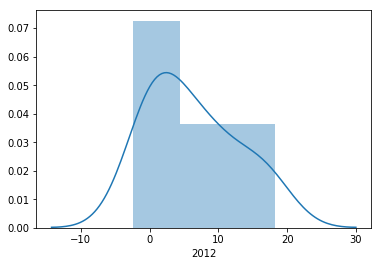

In [59]:
sns.distplot(df_germany['2012']);

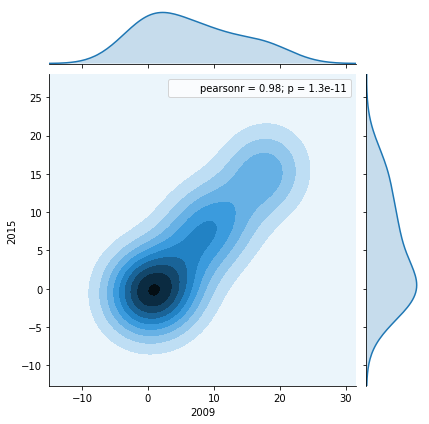

In [63]:
x = df_germany['2009']
y = df_germany['2015']
sns.jointplot(x, y, data=df_germany, kind="kde");

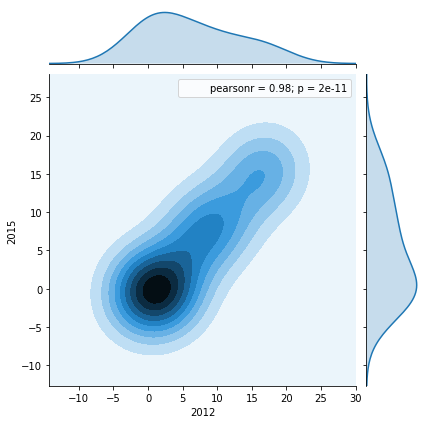

In [62]:
x = df_germany['2012']
y = df_germany['2015']
sns.jointplot(x, y, data=df_germany, kind="kde");